<h1>Data Analyst Assignment<h1>

**Import important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

**Load data from csv file**

In [3]:
df = pd.read_csv(r"D:\analytics_dataset (1).csv")

**Over view of Data**

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<h2> Analyse the data</h2>

-----------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.dtypes[df.dtypes == object]

Education         object
Marital_Status    object
Dt_Customer       object
dtype: object

Change the data_type of column Dt_Customer

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Remove null values from data

In [9]:
df.dropna(inplace=True)  # only income attribute has some Null-Values

Check Duplicates

In [10]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Add some columns
1. TotalSpend
2. DealPurchas

In [11]:
df['TotalSpend'] = df.iloc[:,9:15].sum(axis=1)

In [12]:
df['TotalPurchas'] = df.iloc[:,15:19].sum(axis=1)

Statistical calculation

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpend,TotalPurchas
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,607.075361,14.880866
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,602.900476,7.670957
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,69.000000,8.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.500000,15.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1048.000000,21.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,44.000000


1st Row of data

In [14]:
df.loc[0]

ID                                    5524
Year_Birth                            1957
Education                       Graduation
Marital_Status                      Single
Income                             58138.0
Kidhome                                  0
Teenhome                                 0
Dt_Customer            2012-04-09 00:00:00
Recency                                 58
MntWines                               635
MntFruits                               88
MntMeatProducts                        546
MntFishProducts                        172
MntSweetProducts                        88
MntGoldProds                            88
NumDealsPurchases                        3
NumWebPurchases                          8
NumCatalogPurchases                     10
NumStorePurchases                        4
NumWebVisitsMonth                        7
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp5                             0
AcceptedCmp

_________________________
____________________

**--------------------------------------------------------------------------------------------------------------------------------------------------**

In [15]:
df.groupby('Education')['TotalSpend'].mean()

Education
2n Cycle      494.930000
Basic          81.796296
Graduation    621.686380
Master        609.767123
PhD           676.733888
Name: TotalSpend, dtype: float64

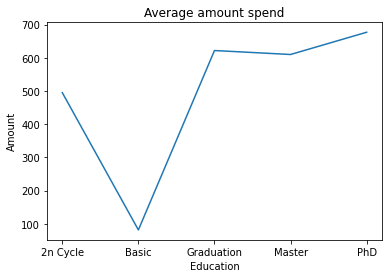

In [16]:
plt.plot(df.groupby('Education')['TotalSpend'].mean())
plt.xlabel("Education")
plt.ylabel("Amount")
plt.title("Average amount spend")
plt.show()

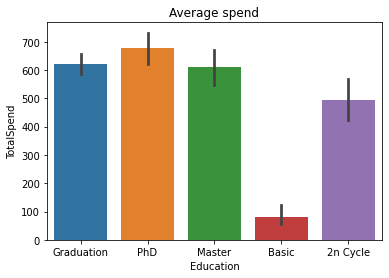

In [17]:
sns.barplot(x='Education',y='TotalSpend',data=df)
plt.title("Average spend")
plt.show()

##### Average TotalSpend:
1. **PhD customer spend more and then Graduation customer**
2. **Basic customer spend less**
3. **PhD > Graduation > Master > 2n Cycle > Basic**
_____________________________
_________________

In [18]:
df.groupby('Education')['Income'].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

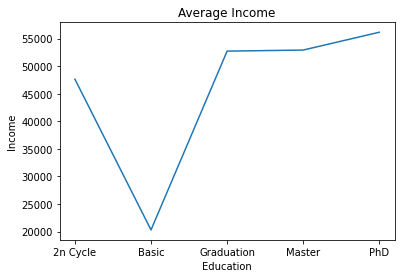

In [19]:
plt.plot(df.groupby('Education')['Income'].mean())
plt.xlabel("Education")
plt.ylabel("Income")
plt.title("Average Income")
plt.show()

##### Average Income:
1. **PhD customer has more Income and then Master customer**
2. **Basic customer has less Income**
3. **PhD >  Master > Graduation > 2n Cycle > Basic**
_____________________________
_________________

In [20]:
df.value_counts('Education')

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
dtype: int64

Text(0.5, 1.0, 'No of counts')

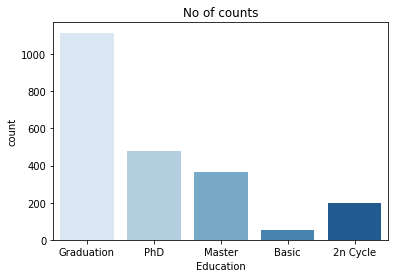

In [21]:
sns.countplot(x='Education',data=df,palette="Blues")
plt.title("No of counts")

##### No of Customer
1. **Graduation > PhD > Master > 2n Cycle > Basic**
___________
___________

In [22]:
l = dict(df.groupby('Kidhome')['TotalSpend'].mean())

[]

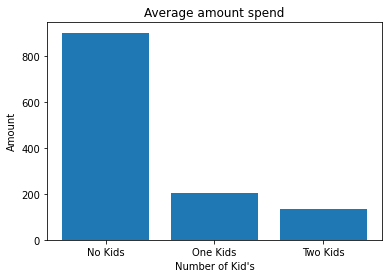

In [23]:
plt.bar(['No Kids',"One Kids","Two Kids"],l.values())
plt.xlabel("Number of Kid's")
plt.ylabel("Amount")
plt.title("Average amount spend")
plt.plot()

##### Average TotalSpend:
1. **The customer having No kids spend more**
2. **The customer having Two kids spend less**
3. **No Kids > One Kids > Two Kids**
_________________
_________________

In [24]:
df.groupby('Kidhome')['MntGoldProds'].mean()

Kidhome
0    60.045207
1    22.111612
2    16.869565
Name: MntGoldProds, dtype: float64

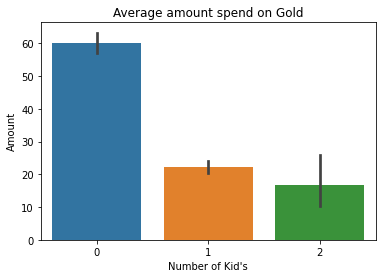

In [25]:
sns.barplot(x='Kidhome',y='MntGoldProds',data=df)
plt.xlabel("Number of Kid's")
plt.ylabel("Amount")
plt.title("Average amount spend on Gold")
plt.show()

##### Average TotalSpend on Gold:
1. **The customer having No kids spend more on Gold**
2. **The customer having Two kids spend less on Gold**
3. **No Kids > One Kids > Two Kids**
______
_________

In [26]:
df['Kidhome'].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

Text(0.5, 1.0, 'No of counts')

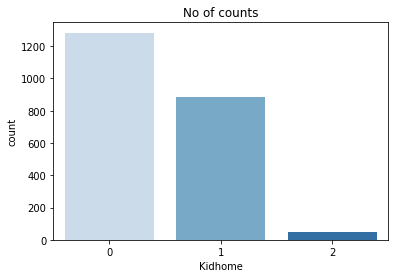

In [27]:
sns.countplot(x='Kidhome',data=df,palette="Blues")
plt.title("No of counts")

##### Number of Customer:
1. **No Kids > One Kids > Two Kids**
________
____________

In [28]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Remove "Alone","YOLO","Absurd" from 'Marital_Status it relfect the result of Major data

In [29]:
for i in ["Alone","YOLO","Absurd"]:
    y = lambda x:df.drop(df[df['Marital_Status'] == x].index, inplace = True)
    y(i)

In [30]:
df.groupby('Marital_Status')['TotalSpend'].mean()

Marital_Status
Divorced    610.629310
Married     591.464411
Single      612.592357
Together    608.846422
Widow       727.960526
Name: TotalSpend, dtype: float64

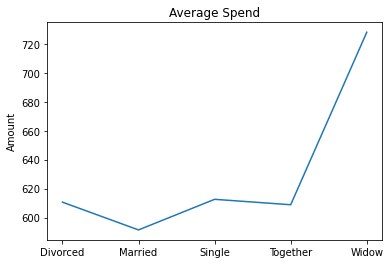

In [31]:
plt.plot(df.groupby('Marital_Status')['TotalSpend'].mean())
plt.ylabel("Amount")
plt.title("Average Spend")
plt.show()

##### Average TotalSpend:
1. **Widow customer spend more and then Single customer**
2. **Married customer spend less**
3. **Widow > single > Divorced > Together > Married**
_____
______

In [32]:
df.groupby('Marital_Status')['MntWines'].mean()

Marital_Status
Divorced    324.844828
Married     299.855309
Single      291.331210
Together    308.403141
Widow       367.131579
Name: MntWines, dtype: float64

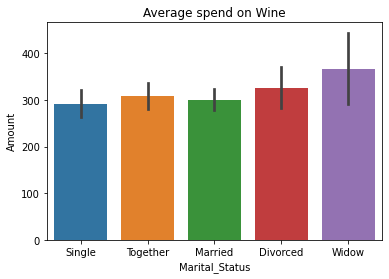

In [33]:
sns.barplot(x='Marital_Status',y='MntWines',data=df)
plt.ylabel("Amount")
plt.title("Average spend on Wine")
plt.show()

##### Average TotalSpend on Wine:
1. **Widow customer spend more on Wine and then Divorced customer**
2. **Single customer spend less**
3. **Widow > Divorced > Together > Married > single**
_____
______

In [34]:
print(df.iloc[:,9:15].sum())
l = dict(df.iloc[:,9:15].sum())

MntWines            674174
MntFruits            58218
MntMeatProducts     369259
MntFishProducts      82963
MntSweetProducts     59808
MntGoldProds         96854
dtype: int64


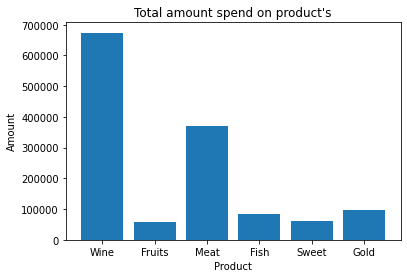

In [35]:
plt.bar(['Wine','Fruits','Meat','Fish','Sweet','Gold'],l.values())
plt.xlabel("Product")
plt.ylabel("Amount")
plt.title("Total amount spend on product's")
plt.show()

##### TotalSpend on products:
1. **Most of amount spend on wine and then Meat**
2. **Less amount spend on Fruits**
3. **Wine > Meat > Gold > Fish > Sweet > Fruit**
_____
______

In [36]:
print(df.iloc[:,15:19].sum())
l = dict(df.iloc[:,15:19].sum())

NumDealsPurchases       5124
NumWebPurchases         9017
NumCatalogPurchases     5900
NumStorePurchases      12818
dtype: int64


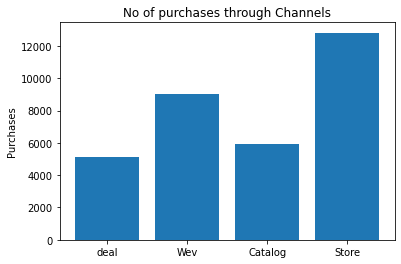

In [37]:
plt.bar(['deal','Wev','Catalog','Store'],l.values())
plt.ylabel("Purchases")
plt.title("No of purchases through Channels")
plt.show()

##### Totalproducts Purchases:
1. **Most of product Purchases from store**
2. **Less of product Purchases from Deal**
3. **Store > Web > Catalog > Deal**
_____
______

**---------------------------------------------------------------------------------------------------------------------------------------------**

**The Customer Who Purchas maximum** 

In [38]:
df.loc[df['TotalPurchas'] ==df['TotalPurchas'].max() ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpend,TotalPurchas
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,0,0,0,0,0,3,11,0,1717,44


**Top 10 Customer who mostly visit on Web**

In [39]:
df.sort_values('NumWebVisitsMonth',ascending=False).head(10).iloc[:,0:20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
774,4303,1957,PhD,Together,6835.0,0,1,2012-08-12,76,107,2,12,2,2,12,0,0,0,1,20
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19
1328,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14
2214,9303,1976,Graduation,Married,5305.0,0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13
605,7141,1986,Master,Single,21888.0,1,0,2012-12-29,15,88,10,46,2,3,64,4,5,1,2,10


**Top 10 Customer who spend more on Wine**

In [40]:
df.sort_values('MntWines',ascending=False).head(10).iloc[:,0:10]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
1749,737,1949,PhD,Married,80360.0,0,0,2013-03-03,56,1493
824,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492
559,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492
2098,1103,1976,Master,Married,81929.0,1,0,2012-09-29,60,1486
543,5547,1982,PhD,Married,84169.0,0,0,2013-07-08,9,1478
917,8362,1982,PhD,Married,84169.0,0,0,2013-07-08,9,1478
1961,3009,1962,PhD,Widow,71670.0,0,0,2013-09-07,8,1462
1641,1665,1964,PhD,Divorced,64140.0,0,2,2013-09-23,71,1459
1488,9743,1955,Graduation,Married,76998.0,0,1,2013-11-01,85,1449
497,11088,1971,PhD,Together,78642.0,0,1,2013-04-21,83,1396


**Top 10 Customer who Purchases through Deal's**

In [41]:
df.sort_values('NumDealsPurchases',ascending=False).head(10).iloc[:,0:17]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,47,181,149,95,95,15,9
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0
21,5376,1979,Graduation,Married,2447.0,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0
1788,1513,1979,2n Cycle,Together,60839.0,1,1,2012-08-28,72,600,21,128,223,150,128,13,2
1503,3594,1973,Master,Married,54108.0,1,1,2012-05-11,74,539,6,91,8,6,97,13,8
287,8148,1956,Master,Together,50898.0,1,1,2013-08-01,88,285,28,242,55,114,135,13,6


**---------------------------------------------------------------------------------------------------------------------------------------------------------**

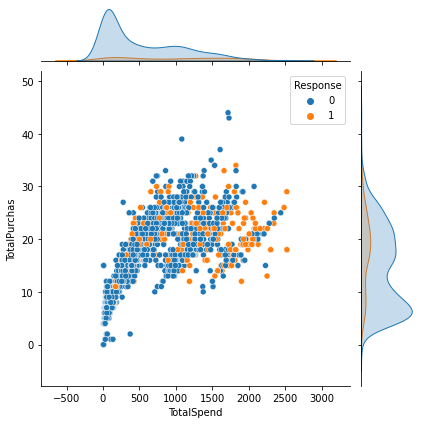

In [42]:
sns.jointplot(x ='TotalSpend',y = 'TotalPurchas',data=df,hue='Response')
plt.show()

In [43]:
l =dict(df.loc[df['Complain']==1]['Education'].value_counts())

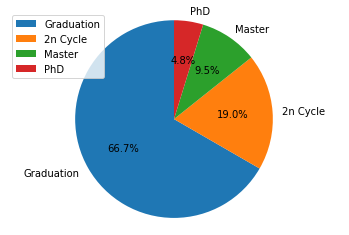

In [44]:
plt.pie(l.values(),labels=l.keys(),startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

**The customer that have Complained in last 2 years. It has a major part of 'Graduate' customer that is '66.7%' and then '2n Cycle' customer that is '19.0%'**

### Thank you